# Amadeus Data Science Challenge

## Exercise 1: Count the number of lines in Python for each file

In [5]:
import bz2

In [10]:
! bzcat bookings.csv.bz2 | head -10000 > bookings.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = bookings.csv.bz2, output file = (stdout)


In [12]:
!bzip2 -f bookings.sample.csv

In [13]:
ls -l

total 1015512
-rw-rw-rw- 1 pipe11 pipe11     61952 Dec 13 21:45 '01_ ACCIDENTES POR TIPO EN  DISTRITOS.xls'
-rw-rw-rw- 1 pipe11 pipe11      3818 Jan 11 09:15  15_TAC_Exercise1.ipynb
-rw-rw-rw- 1 pipe11 pipe11     61532 Jan 11 09:15  16_TAC_Exercise2.ipynb
-rw-rw-rw- 1 pipe11 pipe11      7642 Jan 11 09:15  19_TAC_Exercise5.ipynb
-rw-rw-rw- 1 pipe11 pipe11     35215 Dec 13 21:33  202625-0-aparcamientos-publicos.csv
-rw-rw-rw- 1 pipe11 pipe11    110219 Dec 13 21:21  AccidentesBicicletas_2019.csv
-rw-rw-rw- 1 pipe11 pipe11    178458 Jan 11 09:15  AmadeusChallenge.ipynb
drwxrwxrwx 1 pipe11 pipe11       512 Jan 11 09:26  DS_Challenge_Amadeus/
drwxrwxrwx 1 pipe11 pipe11       512 Jan 10 17:20  Dani_10_01/
-rw-rw-rw- 1 pipe11 pipe11      4012 Nov 29 21:33 'Exercices 29-11.ipynb'
-rw-rw-rw- 1 pipe11 pipe11    616320 Nov 29 17:49  Finn.txt
drwxrwxrwx 1 pipe11 pipe11       512 Dec 26 18:56 'Intro_Python_Igor_&_Toni'/
-rw-rw-rw- 1 pipe11 pipe11     23523 Nov 29 17:43 'My notebook Masterclass Kscho

In [40]:
bookings_file = 'bookings.csv.bz2'
searches_file = 'searches.csv.bz2'

### Con Python

* Uncompresing

In [14]:
fileBz2 = bz2.BZ2File('./bookings.sample.csv.bz2')
type(fileBz2)

bz2.BZ2File

In [16]:
fileBz2 = bz2.BZ2File('./bookings.sample.csv.bz2')
k = 0
for line in fileBz2:
    k += 1
print(k)

10000


In [17]:
fileBz2.closed

False

In [18]:
fileBz2.close()

In [19]:
fileBz2.closed

True

#### Una solución

In [35]:
with bz2.BZ2File('./bookings.sample.csv.bz2') as fileBz2:
    k = 0
    for line in fileBz2:
        k += 1
        if k == 10000:
            break

#Con el break cerramos el fichero al llegar a 10 líneas. EN ESTE BUCLE.
        
print(k)

10000


In [34]:
fileBz2.closed

True

#### Solución 2

In [37]:
with bz2.BZ2File('./bookings.sample.csv.bz2') as fileBz2:
    for k, line in enumerate(fileBz2):
        pass
#Con la iteración enumerate, le damos a pass hasta el final en toda la iteración y finalmente hacemos print.
print(k+1)

10000


In [39]:
try:
    with bz2.BZ2File('./bookings.sample.csv.bz2') as fileBz2:
        for k, line in enumerate(fileBz2):
            pass
    print(k+1)

except FileNotFoundError as mess1:
    print(mess1)

except ValueError:
    print("Value error")


except:
    print("Unexpected error")

10000


In [41]:
bookings = bz2.open(bookings_file)

In [48]:
k = 0
for line in bookings:
    k += 1
    
print(k)

10000006


### 2b) Python on row uncompressed file

## Exercise 2. Top 10 arrival airports in the world in 2013 (using bookings file):

* Arrival airport is the column arr_port. It is the IATA code for the airport
* To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
* Print top 10 arrival airports in the standard output, including the number of passengers.
* Bonus point: Get the name of the city or airport corresponding to that airport (programmatically, we suggest to have a look to GeoBases in Github)
* Bonus point: Solve this problem using pandas (instead of any other approach)

## Get familiar with the data

Options:
    1) prepare the sample
    2) read_csv with nrows option

In [1]:
import pandas as pd
import numpy as np

In [ ]:
#Don't do this!!
b = pd.read_csv('bookings.csv.bz2', sep = '^')

In [ ]:
b = pd.read_csv('bookings.csv.bz2', sep = '^')

In [113]:
b = pd.read_csv('bookings.sample.csv.bz2', sep = '^', nrows = 9999)

In [114]:
b.shape

(9999, 38)

In [115]:
list(b.columns)

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

In [116]:
b.head() #Está ordenado.

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [117]:
b.sample(5) #La diferencia con el anterior es que no está ordenado, coge filas de forma aleatoria.

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
1769,2013-03-25 00:00:00,1V,US,6118de19d9057cbd792b27378c4e0847,79747a9645a0ed5dd277aa8b065b960a,9711968f055a5878b2752f615b6d5ec7,2013-03-25 00:00:00,219,2430,LAS,LAS,US,ORD,CHI,US,ORD,CHI,US,LAS,LAS,US,ORD,CHI,US,LASORD,CHILAS,USUS,0,LASORD,KK,W,Y,2013-04-02 18:00:00,2013-04-02 23:39:32,1,2013,3,NULL
9510,2013-03-27 00:00:00,1A,US,680df47b7eb5e20e3e94b8cdd81e5472,f09cb79948aed29bf48b8bf29c60c5f8,fc816a4c65e5a9c6b0304467a7033006,2013-03-27 00:00:00,708,0,SIN,SIN,SG,KUL,KUL,MY,SIN,SIN,SG,SIN,SIN,SG,KUL,KUL,MY,KULSIN,KULSIN,MYSG,1,SINKUL,WR,N,Y,2013-04-12 06:45:00,2013-04-12 07:53:59,1,2013,3,NULL
1366,2013-03-13 00:00:00,1A,ZW,ee4489a4898162065cfac6d9a814ef94,a973d749664ccc248787e6820cb0c4ea,f2a8f7922d345bcf336b69c1bb123dc1,2013-03-13 00:00:00,30220,0,HRE,HRE,ZW,DUR,DUR,ZA,HRE,HRE,ZW,HRE,HRE,ZW,DUR,DUR,ZA,DURHRE,DURHRE,ZAZW,1,HREJNBDUR,LK,Q,Y,2013-08-09 14:35:00,2013-08-09 19:31:45,5,2013,3,NULL
6555,2013-03-26 00:00:00,1A,US,cb938267f7ffedd641991cb6b2887a08,4812ac0eaf13117b20417bb578dcfd5a,0637584556b207a1b85f70968bdc6ec3,2013-03-26 00:00:00,15122,0,SFO,SFO,US,HKG,HKG,HK,SFO,SFO,US,HKG,HKG,HK,SFO,SFO,US,HKGSFO,HKGSFO,HKUS,1,HKGSFO,MI,L,Y,2013-05-28 14:10:00,2013-05-28 13:02:54,2,2013,3,NULL
2321,2013-03-06 00:00:00,1V,US,2c652e6a9336758534f2a23fa8001315,5dbcc2a56867a77dd2c6d5abeed73353,4ac673a5a8240fd63937d8f0e0101a1e,2013-03-06 00:00:00,33673,0,LAX,LAX,US,DLA,DLA,CM,LAX,LAX,US,DLA,DLA,CM,LAX,LAX,US,DLALAX,DLALAX,CMUS,1,DLABRUYULLAX,KM,T,Y,2013-07-04 21:30:00,2013-07-05 20:13:14,1,2013,3,NULL


In [118]:
pd.set_option('display.max_columns', None)

In [119]:
b.sample(5)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
6680,2013-03-21 00:00:00,1G,SG,ecd93fa6b2a6a82923f18fda28b2754e,42554836c0a719881507b67a7804697c,be24d927d5669088b1b7132c88e6dade,2013-03-21 00:00:00,3534,0,SIN,SIN,SG,HKG,HKG,HK,SIN,SIN,SG,SIN,SIN,SG,HKG,HKG,HK,HKGSIN,HKGSIN,HKSG,1,SINHKG,MI,V,Y,2013-03-22 18:25:00,2013-03-22 22:14:04,1,2013,3,NULL
9330,2013-03-13 00:00:00,1A,US,a2084f7d8ba56c6cdbde14f225cf7117,bc468ca0f65765642b95c4665701c6ca,b0f878b0bbe51626016694032523295b,2013-03-11 00:00:00,8199,0,ITH,ITH,US,SJD,SJD,MX,ITH,ITH,US,ITH,ITH,US,SJD,SJD,MX,ITHSJD,ITHSJD,MXUS,1,ITHEWRSJD,FK,T,Y,2013-04-16 06:15:00,2013-04-16 12:33:01,-2,2013,3,SAN4B2C01
3910,2013-03-31 00:00:00,1A,TH,a7b97f2214ce3fc387e5879c04221f57,01b55490e6f62bb65ba3cc9e0d227c54,b0cd490450b69694ccafe0e08dfd821f,2013-03-27 00:00:00,781,10385,TPE,TPE,TW,SFO,SFO,US,SFO,SFO,US,TPE,TPE,TW,SFO,SFO,US,SFOTPE,SFOTPE,TWUS,1,TPESFO,LC,R,Y,2013-04-24 23:30:00,2013-04-24 21:31:02,2,2013,3,BKKIQ313C
1401,2013-03-28 00:00:00,1A,CA,75374f92391227512b52677821a2d4af,34903d61927f182c4e1b97a25449482b,6fbacfea745374293f65ad6a36aaaf4a,2013-03-27 00:00:00,73425,0,UIO,UIO,EC,GRU,SAO,BR,UIO,UIO,EC,UIO,UIO,EC,GRU,SAO,BR,GRUUIO,SAOUIO,BREC,1,UIOLIMGRU,EK,P,F,2013-03-30 18:32:00,2013-03-31 04:48:07,-1,2013,3,YYZC4213S
3986,2013-03-22 00:00:00,1P,US,83ccf07a55606976f78e63fcc805f58c,1490c3c5f95f04fa076fe15c775a80a9,674ac42019d880fde3a29a3561fa3371,2013-03-22 00:00:00,6812,0,DCA,WAS,US,SDQ,SDQ,DO,DCA,WAS,US,DCA,WAS,US,SDQ,SDQ,DO,DCASDQ,SDQWAS,DOUS,1,DCAMIASDQ,KK,Q,Y,2013-06-10 07:15:00,2013-06-10 20:49:19,3,2013,3,NULL


GDS: Global Distribution System. Eso es Amadeus. La agencia se conecta a Amadeus y Amadeus le devuelve la info y precios de esos vuelos. Pagan a Amadeus para hacer la búsqueda.

Lo actualizan al final el precio.

pos iata = iata de la agencia

pos id = id de la agencia, distintos ordenadores dentro de la agencia. Si se investiga hay hasta 9 niveles dentro de una agencia.

rloc = recon locate, la reserva

cre date = creation date, la primera vez que entramos en la agencia el cre_date = act_date. Si hago algún cambio el cre_date demi reserva no cambia, pero el activity si. Nos sirve para hacer un historial de la reserva. Si hago un groupby en cre_date respecto a ac_date. Puedo ver un historial de la actividad: Cambio de reservas, dirección... etc.

bkg_class = Cuanto hemos pagado por la reserva, puede variar eb función de los servicios. Maletas, seguro cancelación, ida/vuelta, maletas...

cab_class = Economic: Y y Business: C

Route: La ruta que hace MADMUNFRA: Madrid-Munich-Frankfurt

In [120]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 38 columns):
act_date               9999 non-null object
source                 9999 non-null object
pos_ctry               9999 non-null object
pos_iata               9999 non-null object
pos_oid                9999 non-null object
rloc                   9999 non-null object
cre_date               9999 non-null object
duration               9999 non-null int64
distance               9999 non-null int64
dep_port               9999 non-null object
dep_city               9999 non-null object
dep_ctry               9999 non-null object
arr_port               9999 non-null object
arr_city               9999 non-null object
arr_ctry               9999 non-null object
lst_port               9999 non-null object
lst_city               9999 non-null object
lst_ctry               9999 non-null object
brd_port               9999 non-null object
brd_city               9999 non-null object
brd_ctry       

In [121]:
b.describe()

,duration,distance,intl,pax,year,month
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.0
mean,20209.746075,455.608861,0.596260,0.516152,2013.0,3.0
std,42243.233482,1738.891068,0.490671,1.783970,0.0,0.0
min,59.000000,0.000000,0.000000,-25.000000,2013.0,3.0
25%,3339.000000,0.000000,0.000000,-1.000000,2013.0,3.0
50%,7721.000000,0.000000,1.000000,1.000000,2013.0,3.0
75%,19077.000000,0.000000,1.000000,1.000000,2013.0,3.0
max,488131.000000,18481.000000,1.000000,25.000000,2013.0,3.0


In [122]:
b.groupby('rloc          ')['act_date           '].count().sort_values(ascending = False).head(20)
#Muestra las veces que se ha cambiado algo en la reserva, las cuenta y las ordena de mayor a menor.
#Si le digo que a cada reserva los ordene sergún el activity date... Me muestra su historial.

rloc          
ae15bcfc5aec0eb64b2c5204d08201d5    42
fb72a3899ed1cd353c5830388935e7f5    23
cd96f7b7fdb5743769053ba273c7eb5f    20
6b7878dd4ac59772e14ab4760ab45ad0    20
68aee71ee0f40aff44ed341f2c5f8627    16
2a86eac3e29c922f4a439fbc0480985b    15
58ee9c6852513816a39363a1621a0615    14
503d8dde8034a48c262b3f5764fc60ca    14
c9f19404e4f0755c40deaebd6e90ea84    13
182485c12b7e38aa6e2d24f7484c019b    12
cdf795b1e5710dc813c8b1147b427827    12
f3a5185d14eaa5258320bac03c5d9fc0    12
02ab3e3ded19a8cc6eb67c4413debb86    12
b8410227afd9eff71f9ed9c0e7013ddf    12
045e1c73107a2e4a39013d60e9b45aa3    12
a37584d1485cb35991e4ff1a2ba92262    12
f25cef4ed37d1483d0c4c7cfba9758ef    12
b0cd490450b69694ccafe0e08dfd821f    11
bab3d4e3fb3bee5e88340e7c359c6f13    11
2da897a9523b22f3e2cb9cd7099e0639    11
Name: act_date           , dtype: int64

In [123]:
b[ b['rloc          '] == 'ae15bcfc5aec0eb64b2c5204d08201d5'].sort_values('act_date           ', ascending = True)
#No coincide el act_date con el cre_date. No tenemos todo el historial. Nos faltan datos.

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
7745,2013-03-01 00:00:00,1P,ZA,9782cc0d8e04d24e7346699ea97d5f90,63dd6e471fa135a362bb8f9320190247,ae15bcfc5aec0eb64b2c5204d08201d5,2012-12-21 00:00:00,62781,0,JNB,JNB,ZA,LAX,LAX,US,JNB,JNB,ZA,JNB,JNB,ZA,LAX,LAX,US,JNBLAX,JNBLAX,USZA,1,JNBFRALAX,VR,Q,Y,2013-06-09 19:05:00,2013-06-10 12:55:31,-2,2013,3,NULL
7746,2013-03-01 00:00:00,1P,ZA,9782cc0d8e04d24e7346699ea97d5f90,63dd6e471fa135a362bb8f9320190247,ae15bcfc5aec0eb64b2c5204d08201d5,2012-12-21 00:00:00,62781,0,JNB,JNB,ZA,LAX,LAX,US,JNB,JNB,ZA,ZRH,ZRH,CH,JNB,JNB,ZA,JNBZRH,JNBZRH,CHZA,1,ZRHJNB,VI,W,Y,2013-07-22 22:45:00,2013-07-23 09:26:54,-2,2013,3,NULL
7747,2013-03-01 00:00:00,1P,ZA,9782cc0d8e04d24e7346699ea97d5f90,63dd6e471fa135a362bb8f9320190247,ae15bcfc5aec0eb64b2c5204d08201d5,2012-12-21 00:00:00,63307,0,CPT,CPT,ZA,LAX,LAX,US,CPT,CPT,ZA,CPT,CPT,ZA,LAX,LAX,US,CPTLAX,CPTLAX,USZA,1,CPTJNBFRALAX,VR,Q,Y,2013-06-09 15:10:00,2013-06-10 12:55:31,2,2013,3,NULL
7748,2013-03-01 00:00:00,1P,ZA,9782cc0d8e04d24e7346699ea97d5f90,63dd6e471fa135a362bb8f9320190247,ae15bcfc5aec0eb64b2c5204d08201d5,2012-12-21 00:00:00,63307,0,CPT,CPT,ZA,LAX,LAX,US,CPT,CPT,ZA,ZRH,ZRH,CH,CPT,CPT,ZA,CPTZRH,CPTZRH,CHZA,1,ZRHJNBCPT,VI,W,Y,2013-07-22 22:45:00,2013-07-23 14:17:39,2,2013,3,NULL
7749,2013-03-02 00:00:00,1P,ZA,9782cc0d8e04d24e7346699ea97d5f90,63dd6e471fa135a362bb8f9320190247,ae15bcfc5aec0eb64b2c5204d08201d5,2012-12-21 00:00:00,63307,0,CPT,CPT,ZA,LAX,LAX,US,CPT,CPT,ZA,CPT,CPT,ZA,LAX,LAX,US,CPTLAX,CPTLAX,USZA,1,CPTJNBFRALAX,VR,Q,Y,2013-06-09 15:10:00,2013-06-10 12:55:31,-2,2013,3,NULL
7750,2013-03-02 00:00:00,1P,ZA,9782cc0d8e04d24e7346699ea97d5f90,63dd6e471fa135a362bb8f9320190247,ae15bcfc5aec0eb64b2c5204d08201d5,2012-12-21 00:00:00,63307,0,CPT,CPT,ZA,ZRH,ZRH,CH,CPT,CPT,ZA,CPT,CPT,ZA,JNB,JNB,ZA,CPTJNB,CPTJNB,ZAZA,0,CPTJNB,DK,Q,Y,2013-06-09 15:10:00,2013-06-09 17:27:39,2,2013,3,NULL
7751,2013-03-04 00:00:00,1P,ZA,9782cc0d8e04d24e7346699ea97d5f90,63dd6e471fa135a362bb8f9320190247,ae15bcfc5aec0eb64b2c5204d08201d5,2012-12-21 00:00:00,63307,0,CPT,CPT,ZA,ZRH,ZRH,CH,CPT,CPT,ZA,CPT,CPT,ZA,JNB,JNB,ZA,CPTJNB,CPTJNB,ZAZA,0,CPTJNB,DK,Q,Y,2013-06-09 15:10:00,2013-06-09 17:27:39,-2,2013,3,NULL
7752,2013-03-04 00:00:00,1P,ZA,9782cc0d8e04d24e7346699ea97d5f90,63dd6e471fa135a362bb8f9320190247,ae15bcfc5aec0eb64b2c5204d08201d5,2012-12-21 00:00:00,63307,0,CPT,CPT,ZA,LAX,LAX,US,CPT,CPT,ZA,CPT,CPT,ZA,LAX,LAX,US,CPTLAX,CPTLAX,USZA,1,CPTJNBFRALAX,VR,Q,Y,2013-06-09 15:10:00,2013-06-10 12:55:31,2,2013,3,NULL
7756,2013-03-07 00:00:00,1P,ZA,9782cc0d8e04d24e7346699ea97d5f90,63dd6e471fa135a362bb8f9320190247,ae15bcfc5aec0eb64b2c5204d08201d5,2012-12-21 00:00:00,62781,0,JNB,JNB,ZA,LAX,LAX,US,JNB,JNB,ZA,ZRH,ZRH,CH,JNB,JNB,ZA,JNBZRH,JNBZRH,CHZA,1,ZRHJNB,VI,W,Y,2013-07-22 22:45:00,2013-07-23 09:26:54,2,2013,3,NULL
7755,2013-03-07 00:00:00,1P,ZA,9782cc0d8e04d24e7346699ea97d5f90,63dd6e471fa135a362bb8f9320190247,ae15bcfc5aec0eb64b2c5204d08201d5,2012-12-21 00:00:00,62781,0,JNB,JNB,ZA,LAX,LAX,US,JNB,JNB,ZA,JNB,JNB,ZA,LAX,LAX,US,JNBLAX,JNBLAX,USZA,1,JNBFRALAX,VR,Q,Y,2013-06-09 19:05:00,2013-06-10 12:55:31,2,2013,3,NULL


## Select the columns of interest

### Our columns of interest:
* arr_port
* pax
* year

## What to do with NaN?

In the sample everything might be ok, but we should prepare for NaN case

In [124]:
import pandas as pd
pd.set_option('display.max_columns', None)
b = pd.read_csv('bookings.csv.bz2', sep = '^', usecols = ['arr_port', 'pax', 'year'], nrows = 9999)
b = b.dropna()

In [125]:
len(b)

9999

Con esto conseguimos una tabla con nuestras tres columnas: arr_port, pax, year.

#### Plan:
    1) filter 2013
    2) Groupby arr_port, pax, year
    3) sum sobre pax
    4) ordenar sobre sum de pax
    5) top 10

In [128]:
import pandas as pd
pd.set_option('display.max_columns', None)
b = pd.read_csv('bookings.csv.bz2', sep = '^', usecols = ['arr_port', 'pax', 'year'], nrows = 9999)
b = b.dropna()

In [131]:
b1 = b[ b['year'] == 2013] #Hago el filtro y lo aplico directamente al DataFrame. Ahora podemos hacer delete a la columna 'year'.

del b1['year']

In [132]:
b1.groupby(['arr_port']).sum().sort_values('pax', ascending = False).head(10)

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


In [142]:
import pandas as pd
pd.set_option('display.max_columns', None)
b = pd.read_csv('bookings.csv.bz2', sep = '^', usecols = ['arr_port', 'pax', 'year'], nrows = 9999)
b = b.dropna()
b1 = b[ b['year'] == 2013]
del b1['year']
b1.groupby(['arr_port']).sum().sort_values('pax', ascending = False).head(10)

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


In [143]:
bi = pd.read_csv('bookings.csv.bz2', sep = '^', usecols = ['arr_port', 'pax', 'year'], nrows = 9999, iterator = True)

In [144]:
b2 = bi.get_chunk(2000)
b2.shape

(2000, 3)

In [145]:
b2 = bi.get_chunk(1)

### Define chunksize

In [146]:
bi = pd.read_csv('bookings.csv.bz2', sep = '^', usecols = ['arr_port', 'pax', 'year'], nrows = 9999, chunksize = 3000)

In [147]:
b2 = bi.get_chunk(2000)
b2.shape

(2000, 3)

In [148]:
for i, b in enumerate(bi):
    print(len(b))

3000
3000
1999


Vamos a alipcar el código anterior de sumatorio de los aeuropuertos a los chunks:

El codigo si lo lanzo a un trozo, me devuelve el top 10 de ese trozo.

* No hace falta ordenar el trozo de cada código, así que lo borramos del código.

Entonces tengo que guardar de cada trozo todos los resultados. Se ha de sumar todos los resultados de cada trozo. Podemos hacerlo con diccionarios o un DataFrame. Lo haremos con DataFrame: si hacemos un append, concatenamos los resultados y creamos nuestro DataFrame.

In [153]:
import pandas as pd
pd.set_option('display.max_columns', None)

bi = pd.read_csv('bookings.csv.bz2', sep = '^', usecols = ['arr_port', 'pax', 'year'], nrows = 9999, chunksize = 3000)

all_chunks = pd.DataFrame()

for i, b in enumerate(bi):
    print(i, len(b))
    b = b.dropna()
    b = b[ b['year'] == 2013]
    del b['year']
    result = b.groupby(['arr_port']).sum()

    all_chunks = all_chunks.append(result)

#Podemos machacar result. Ya no lo vamos a usar fuera de la iteración. Aún así, hacemos result_all
result_all = all_chunks.reset_index().groupby(['arr_port']).sum().sort_values('pax', ascending = False)
result_all.head(10)

0 3000
1 3000
2 3000
3 999


,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


In [150]:
all_chunks.shape

(1344, 1)

In [152]:
all_chunks.reset_index().shape

(1344, 2)

In [151]:
all_chunks.reset_index()

,arr_port,pax
0,ABQ,2
1,ACC,0
2,ADD,4
3,AEP,3
4,AER,1
...,...,...
1339,YUL,3
1340,YVR,2
1341,YYC,-1
1342,YYJ,2


Copiamos el código y lo aplicamos a todo

### Pre-Bonus Solution

In [2]:
%%time
import pandas as pd
pd.set_option('display.max_columns', None)

bi = pd.read_csv('bookings.csv.bz2', sep = '^', usecols = ['arr_port', 'pax', 'year'], chunksize = 1000000)

all_chunks = pd.DataFrame()

for i, b in enumerate(bi):
    print(i, len(b))
    b = b.dropna()
    b = b[ b['year'] == 2013]
    del b['year']
    result = b.groupby(['arr_port']).sum()

    all_chunks = all_chunks.append(result)

#Podemos machacar result. Ya no lo vamos a usar fuera de la iteración. Aún así, hacemos result_all
result_all = all_chunks.reset_index().groupby(['arr_port']).sum().sort_values('pax', ascending = False).reset_index()
result_all.head(10)

0 1000000
1 1000000
2 1000000
3 1000000
4 1000000
5 1000000
6 1000000
7 1000000
8 1000000
9 1000000
10 10
CPU times: user 3min 58s, sys: 4.05 s, total: 4min 2s
Wall time: 4min 1s


,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAX,70530.0
3,LAS,69630.0
4,JFK,66270.0
5,CDG,64490.0
6,BKK,59460.0
7,MIA,58150.0
8,SFO,58000.0
9,DXB,55590.0


In [3]:
result_all.shape

(2274, 2)

## Bonus 2:

### Now we've got the airports

we have to install geobases pip install GeoBases

In [164]:
%automagic


Automagic is ON, % prefix IS NOT needed for line magics.


In [1]:
%pip install neobase

    100% |████████████████████████████████| 3.2MB 186kB/s ta 0:00:01
  Running setup.py bdist_wheel for neobase ... done
  Stored in directory: /home/pipe11/.cache/pip/wheels/f2/e0/a1/798ba3be3b5e9d00394376068d895114f574c06f6954dafc59
Successfully built neobase
Note: you may need to restart the kernel to use updated packages.


In [4]:
import neobase as nb

In [7]:
from neobase import NeoBase

In [5]:
dir(nb)

['LatLng',
 'NeoBase',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'neobase']

In [8]:
help(nb)

Help on package neobase:

NAME
    neobase - # -*- coding: utf-8 -*-

PACKAGE CONTENTS
    __main__
    neobase

FILE
    /home/pipe11/.local/lib/python3.6/site-packages/neobase/__init__.py




In [9]:
help(NeoBase)

Help on class NeoBase in module neobase.neobase:

class NeoBase(builtins.object)
 |  Main structure, a wrapper around a dict, with dict-like behavior.
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key)
 |      Test if a key is in the base.
 |      
 |      :param key: the key of to be tested
 |      :returns:   a boolean
 |      
 |      >>> b = NeoBase()
 |      >>> 'AN' in b
 |      False
 |      >>> 'AGN' in b
 |      True
 |  
 |  __init__(self, rows=None, date=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |      Returns iterator of all keys in the base.
 |      
 |      :returns: the iterator of all keys
 |      
 |      >>> b = NeoBase()
 |      >>> sorted(b)
 |      ['AAA', 'AAA@1', 'AAB', ...
 |  
 |  __len__(self)
 |      Testing structure size.
 |      
 |      :returns: a integer
 |      
 |      >>> b = NeoBase()
 |      >>> 18000 < len(b) < 20000
 |      True
 |  
 |  __nonzero__(self)
 |      Testing str

In [11]:
geoDict = NeoBase()

In [12]:
dir(geoDict)

['DUPLICATES',
 'FIELDS',
 'KEY',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_distances',
 '_data',
 '_empty_value',
 'distance',
 'distance_between_locations',
 'find_closest_from_location',
 'find_near',
 'find_near_location',
 'find_with',
 'get',
 'get_location',
 'keys',
 'load',
 'set',
 'skip']

In [14]:
type(geoDict)

neobase.neobase.NeoBase

In [15]:
geoDict.get('LHR')

{'__dup__': set(),
 'iata_code': 'LHR',
 'name': 'London Heathrow Airport',
 'lat': '51.4775',
 'lng': '-0.461389',
 'page_rank': 0.44517643489228376,
 'country_code': 'GB',
 'country_name': 'United Kingdom',
 'continent_name': 'Europe',
 'timezone': 'Europe/London',
 'city_code_list': ['LON'],
 'city_name_list': ['London'],
 'location_type': ['A'],
 'currency': 'GBP'}

In [16]:
type(geoDict.get('LHR'))

dict

In [18]:
geoDict.get('LHR')['name']
#Aplicar esto a todos los aeropuertos en result_all y sacar una columna con el nombre de la ciudad.

'London Heathrow Airport'

In [19]:
result_all.arr_port[0]

'LHR     '

In [29]:
result_all_prueba['arr_port'] = result_all['arr_port'].str.replace(' ','')
result_all_prueba.arr_port[0]

'LHR'

In [23]:
result_all['arr_port'] = result_all['arr_port'].str.strip()

In [24]:
result_all.arr_port[0]

'LHR'

#### How do we put the name of each airport into the DF?

In [30]:
geoDict.get(result_all.arr_port[0])['name']

'London Heathrow Airport'

In [31]:
result_all['AirportName'] = result_all['arr_port'].map(lambda x: geoDict.get(x)['name'])
#Nos da un error, porque el key del lambda, al aplicar la función hay un código que no se corresponde.

KeyError: 'Key not found: CPQ'

In [33]:
print(len(result_all))
result_all = result_all[ result_all['arr_port'] != 'CPQ']
print(len(result_all))

2273
2273


In [36]:
result_all['AirportName'] = result_all['arr_port'].map(lambda x: geoDict.get(x)['name'])
result_all.head(10)

,arr_port,pax,AirportName
0,LHR,88809.0,London Heathrow Airport
1,MCO,70930.0,Orlando International Airport
2,LAX,70530.0,Los Angeles International Airport
3,LAS,69630.0,McCarran International Airport
4,JFK,66270.0,John F. Kennedy International Airport
5,CDG,64490.0,Paris Charles de Gaulle Airport
6,BKK,59460.0,Suvarnabhumi Airport
7,MIA,58150.0,Miami International Airport
8,SFO,58000.0,San Francisco International Airport
9,DXB,55590.0,Dubai International Airport


In [37]:
result_all = result_all.astype({'pax': int})

## Final Solution

In [39]:
top10 = result_all.head(10)
top10

,arr_port,pax,AirportName
0,LHR,88809,London Heathrow Airport
1,MCO,70930,Orlando International Airport
2,LAX,70530,Los Angeles International Airport
3,LAS,69630,McCarran International Airport
4,JFK,66270,John F. Kennedy International Airport
5,CDG,64490,Paris Charles de Gaulle Airport
6,BKK,59460,Suvarnabhumi Airport
7,MIA,58150,Miami International Airport
8,SFO,58000,San Francisco International Airport
9,DXB,55590,Dubai International Airport


Ahora lo que haremos es exportar el DataFrame result_all a un fichero CSV con sep = ^

#DS piden más modelos y para Data Enginer, piden lo mismo pero en Scala.

In [42]:
result_all.to_csv('top_airports.csv', sep ='^', index = False)
#Index false hace que quite el índice del DataFrame al pasarlo a un CSV.

In [43]:
! ls -l

total 1015808
-rw-rw-rw- 1 pipe11 pipe11     61952 Dec 13 21:45 '01_ ACCIDENTES POR TIPO EN  DISTRITOS.xls'
-rw-rw-rw- 1 pipe11 pipe11      3818 Jan 11 09:15  15_TAC_Exercise1.ipynb
-rw-rw-rw- 1 pipe11 pipe11     61532 Jan 11 09:15  16_TAC_Exercise2.ipynb
-rw-rw-rw- 1 pipe11 pipe11      7642 Jan 11 09:15  19_TAC_Exercise5.ipynb
-rw-rw-rw- 1 pipe11 pipe11     35215 Dec 13 21:33  202625-0-aparcamientos-publicos.csv
-rw-rw-rw- 1 pipe11 pipe11    110219 Dec 13 21:21  AccidentesBicicletas_2019.csv
-rw-rw-rw- 1 pipe11 pipe11    207422 Jan 11 13:34 'Amadeus Challenge Inclass.ipynb'
-rw-rw-rw- 1 pipe11 pipe11    178458 Jan 11 09:15  AmadeusChallenge.ipynb
drwxrwxrwx 1 pipe11 pipe11       512 Jan 11 09:26  DS_Challenge_Amadeus
drwxrwxrwx 1 pipe11 pipe11       512 Jan 10 17:20  Dani_10_01
-rw-rw-rw- 1 pipe11 pipe11      4012 Nov 29 21:33 'Exercices 29-11.ipynb'
-rw-rw-rw- 1 pipe11 pipe11    616320 Nov 29 17:49  Finn.txt
drwxrwxrwx 1 pipe11 pipe11       512 Dec 26 18:56 'Intro_Python_Igor_&_Toni'

In [44]:
! head top_airports.csv

arr_port^pax^AirportName
LHR^88809^London Heathrow Airport
MCO^70930^Orlando International Airport
LAX^70530^Los Angeles International Airport
LAS^69630^McCarran International Airport
JFK^66270^John F. Kennedy International Airport
CDG^64490^Paris Charles de Gaulle Airport
BKK^59460^Suvarnabhumi Airport
MIA^58150^Miami International Airport
SFO^58000^San Francisco International Airport


## Exercise 5: Write a Web Service

•	Wrap the output of the second exercise that returns the data in JSON format (instead of printing to the standard output).

•	The web service should accept a parameter n>0. For the top 10 airports, n is 10. For the X top airports, n is X.

JSON: Tiene toda la información de los datos que tiene dentro, puede haber listas, tuplas... etc.


## Web Service

http://flask.pocoo.org/docs/0.10/quickstart

Lo que ejecutas lo ejecutas en otro ordenador. EL web service te da un servidor y te da la comunicación con tu código del Notebook. Con el Notebook nos podemos conectar a otros ordenador/servidor.

In [45]:
import json

In [46]:
list("abcd")

['a', 'b', 'c', 'd']

In [47]:
json.dumps(list("abcd"))

'["a", "b", "c", "d"]'

In [51]:
myDict = {'name': 'Hey', "age": 31, "city": "Madrid"}

In [52]:
myDict

{'name': 'Hey', 'age': 31, 'city': 'Madrid'}

In [53]:
json.dumps(myDict) 
#El formato de Json y en Notebook de Python es practicamente el mismo.

'{"name": "Hey", "age": 31, "city": "Madrid"}'

Vamos a crear varios diccionarios y crearnos un DataFrame y veremos como se ve en formato Json

In [58]:
myDict2 = {'name': ['Hey', 'Holi'], "age": [31, 45], "city": ["Madrid", "New York"]}
myDict2

{'name': ['Hey', 'Holi'], 'age': [31, 45], 'city': ['Madrid', 'New York']}

In [59]:
import pandas as pd

In [60]:
df_from_dict = pd.DataFrame.from_dict(myDict2)

In [61]:
df_from_dict

,name,age,city
0,Hey,31,Madrid
1,Holi,45,New York


In [62]:
df_from_dict.to_json()

'{"name":{"0":"Hey","1":"Holi"},"age":{"0":31,"1":45},"city":{"0":"Madrid","1":"New York"}}'

In [63]:
df_from_dict = pd.DataFrame.from_dict(myDict2, orient = 'index')

In [65]:
df_from_dict

,0,1
name,Hey,Holi
age,31,45
city,Madrid,New York


In [66]:
df_from_dict.to_json()
#Al verlo en texto JSON puedo ver si es una tupla, un diccionario, un valor, una lista, etc... 
#Se usa mucho para mandar la información en formato de texto.

'{"0":{"name":"Hey","age":31,"city":"Madrid"},"1":{"name":"Holi","age":45,"city":"New York"}}'

In [67]:
ls

'01_ ACCIDENTES POR TIPO EN  DISTRITOS.xls'
 15_TAC_Exercise1.ipynb
 16_TAC_Exercise2.ipynb
 19_TAC_Exercise5.ipynb
 202625-0-aparcamientos-publicos.csv
 AccidentesBicicletas_2019.csv
'Amadeus Challenge Inclass.ipynb'
 AmadeusChallenge.ipynb
 DS_Challenge_Amadeus/
 Dani_10_01/
'Exercices 29-11.ipynb'
 Finn.txt
'Intro_Python_Igor_&_Toni'/
'My notebook Masterclass Kschool 23112019.ipynb'
 Python_Pandas_Benat/
 Untitled.ipynb
 bookings.csv.bz2
 bookings.sample.csv.bz2
 kk.txt
 newfile.txt
 searches.csv.bz2
 tips.csv
 top_airports.csv


In [68]:
df = pd.read_csv('top_airports.csv', sep = '^')

In [70]:
df.head(20).to_json()
#Con to_json(), lo pasamos a formato texto JSON
#Es dificil de mirar, pero en algunas páginas web, te mira si es válido o no: Jsonformatter.com

'{"arr_port":{"0":"LHR","1":"MCO","2":"LAX","3":"LAS","4":"JFK","5":"CDG","6":"BKK","7":"MIA","8":"SFO","9":"DXB","10":"ORD","11":"FCO","12":"IST","13":"DFW","14":"CUN","15":"MAD","16":"BCN","17":"LGA","18":"ATL","19":"EWR"},"pax":{"0":88809,"1":70930,"2":70530,"3":69630,"4":66270,"5":64490,"6":59460,"7":58150,"8":58000,"9":55590,"10":53200,"11":45120,"12":43850,"13":42420,"14":42000,"15":41410,"16":41200,"17":40712,"18":39780,"19":36890},"AirportName":{"0":"London Heathrow Airport","1":"Orlando International Airport","2":"Los Angeles International Airport","3":"McCarran International Airport","4":"John F. Kennedy International Airport","5":"Paris Charles de Gaulle Airport","6":"Suvarnabhumi Airport","7":"Miami International Airport","8":"San Francisco International Airport","9":"Dubai International Airport","10":"Chicago O\'Hare International Airport","11":"Leonardo da Vinci\\u2013Fiumicino Airport","12":"Istanbul Airport","13":"Dallas\\/Fort Worth International Airport","14":"Canc\\u

##  Exercise 3: Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

Suggestion: follow the below plan of action:

* Get familiar with the data
* Select columns of interest
* Decide what to do with NaNs

* Make processing plan
* Develop code that works with a sample

* Adjust the code to work with Big data
* Test big data approach on a sample

* Run program with big data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
searches = './searches.csv.bz2'

Primero vamos a crear un sample con la línea de comandos, como lo hicimos con el archivo booking de ejercicios anteriores.

In [55]:
! bzcat ./searches.csv.bz2 | head -100000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = ./searches.csv.bz2, output file = (stdout)


In [56]:
!bzip2 -f searches.sample.csv

In [20]:
ls -l

total 473428
-rw-rw-rw- 1 pipe11 pipe11     13415 Jan 13 13:07  01_ADSC_Exercise1.ipynb
-rw-rw-rw- 1 pipe11 pipe11    205272 Jan 13 13:23  02_ADSC_Exercise2.ipynb
-rw-rw-rw- 1 pipe11 pipe11     40571 Jan 13 13:26  05_ADSC_Exercise3.ipynb
-rw-rw-rw- 1 pipe11 pipe11    212435 Jan 13 16:01  06_intro_to_pandas_practical.ipynb
-rw-rw-rw- 1 pipe11 pipe11    233647 Jan 13 17:36 'Amadeus Challenge Inclass.ipynb'
-rw-rw-rw- 1 pipe11 pipe11    535893 Jan 11 09:30  bookings.sample.csv.bz2
-rw-rw-rw- 1 pipe11 pipe11 483188920 Jan 11 09:20  searches.csv.bz2
-rw-rw-rw- 1 pipe11 pipe11    244720 Jan 13 16:23  searches.sample.csv.bz2
-rw-rw-rw- 1 pipe11 pipe11     77878 Jan 11 13:34  top_airports.csv


In [71]:
sample_searches = pd.read_csv('searches.sample.csv.bz2', sep = '^', nrows = 99999)

In [72]:
pd.set_option('display.max_columns', None)
sample_searches.sample(10)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
11385,2013-01-12,17:33:37,MPT,1aed5e3e24c27e27a9863fa275517643,US,PSC,SAL,1,2,PSC,SAL,2013-05-09,NaN,NaN,SAL,PSC,2013-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LAX
34753,2013-02-04,23:35:29,FXP,67e37f20c6567f91513164f124c7f1d1,DE,FRA,DOH,0,2,FRA,DOH,2013-03-02,BC,K,DOH,KUL,2013-03-02,BC,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BER
64896,2013-03-06,15:14:29,CCP,3565e31495ecfd46fa018339d20382b1,SA,AHB,RUH,0,1,AHB,RUH,2013-03-12,KP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED
14114,2013-01-15,16:13:09,MPT,0c618d30c252b880d8a83ebb76af7643,SE,CPH,BNE,1,2,CPH,BNE,2013-03-03,NaN,NaN,BNE,CPH,2013-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
50820,2013-02-20,23:27:40,MPT,440642a9bdaeb6287f826cefd73255e8,US,ICN,PEK,1,2,ICN,PEK,2013-03-16,NaN,NaN,PEK,ICN,2013-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
17063,2013-01-18,18:42:12,MPT,36a85b978f31b29989eea465daf879c1,RU,MOW,RIO,1,2,MOW,RIO,2013-06-29,NaN,NaN,RIO,MOW,2013-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MOW
47599,2013-02-17,21:05:09,MPT,1aed5e3e24c27e27a9863fa275517643,US,SAN,HNL,1,2,SAN,HNL,2013-08-01,NaN,NaN,HNL,SAN,2013-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LAX
84466,2013-03-26,04:15:31,FQD,1d2683bbdb8a6782f71afe17b6386a63,UA,YVR,KBP,1,2,YVR,KBP,2013-03-26,NaN,NaN,KBP,YVR,2013-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,IEV
14692,2013-01-15,16:24:26,MPT,715773658985f59706880801440e0678,FI,SCL,FRA,0,1,SCL,FRA,2013-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HEL
38941,2013-02-08,15:20:45,MTC,236cbf458f79dbb9d5e9c9430438c3db,US,IAD,EBL,0,1,IAD,EBL,2013-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN


In [74]:
sample_searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 45 columns):
Date                 99999 non-null object
Time                 99999 non-null object
TxnCode              99999 non-null object
OfficeID             99999 non-null object
Country              99984 non-null object
Origin               99999 non-null object
Destination          99999 non-null object
RoundTrip            99999 non-null int64
NbSegments           99999 non-null int64
Seg1Departure        99999 non-null object
Seg1Arrival          99999 non-null object
Seg1Date             99604 non-null object
Seg1Carrier          37841 non-null object
Seg1BookingCode      10777 non-null object
Seg2Departure        72140 non-null object
Seg2Arrival          72140 non-null object
Seg2Date             71677 non-null object
Seg2Carrier          26819 non-null object
Seg2BookingCode      9272 non-null object
Seg3Departure        5174 non-null object
Seg3Arrival          5174 non-null 

In [75]:
sample_searches.describe()

,RoundTrip,NbSegments,IsPublishedForNeg,IsFromInternet,IsFromVista
count,99999.000000,99999.000000,99999.0,99999.0,99999.0
mean,0.704657,1.830378,0.0,0.0,0.0
std,0.456199,0.718122,0.0,0.0,0.0
min,0.000000,1.000000,0.0,0.0,0.0
25%,0.000000,1.000000,0.0,0.0,0.0
50%,1.000000,2.000000,0.0,0.0,0.0
75%,1.000000,2.000000,0.0,0.0,0.0
max,1.000000,10.000000,0.0,0.0,0.0


## Select the columns of interest

In [77]:
sample_searches = sample_searches[['Date', 'Destination']]
sample_searches.sample(10)

,Date,Destination
41274,2013-02-11,MNL
6832,2013-01-07,MAN
51627,2013-02-21,STL
39193,2013-02-09,BOJ
65124,2013-03-07,LIR
17605,2013-01-18,NAT
7189,2013-01-08,PDX
27007,2013-01-28,PMI
90473,2013-04-01,DUB
24949,2013-01-25,LAX


Pero las que queremos nosotros son las del aeropuerto de Madrid: MAD, el aeropuerto de Barcelona: BCN y el aeropuerto de Málaga: AGP

Así que aplicaremos un filtro a destination con estos tres destinos.

## What to do with NaNs
No va a hacer falta para nuestras columnas, ninguna tiene NaNs

## Make processing plan

* Filter: -MAD, BCN, AGP
* Create a month column with this format YYYY-MM
* Group by
* Sum
* Plot the results

### Filter

In [78]:
key_destinations = ['MAD', 'BCN', 'AGP']
key_searches = sample_searches[sample_searches['Destination'].isin(key_destinations)]

key_searches[['Date', 'Destination']].sample(10)

,Date,Destination
91734,2013-04-02,MAD
23726,2013-01-24,AGP
14341,2013-01-15,MAD
21509,2013-01-22,MAD
26645,2013-01-27,MAD
16340,2013-01-17,MAD
16750,2013-01-17,BCN
81376,2013-03-23,MAD
15473,2013-01-16,BCN
73335,2013-03-15,BCN


In [79]:
key_searches[['Date', 'Destination']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3663 entries, 4 to 99992
Data columns (total 2 columns):
Date           3663 non-null object
Destination    3663 non-null object
dtypes: object(2)
memory usage: 85.9+ KB


In [80]:
pd.to_datetime(key_searches['Date']).head(2)

4    2013-01-01
93   2013-01-01
Name: Date, dtype: datetime64[ns]

### Create of Departure_month column

In [81]:
key_searches['Departure_Month'] = key_searches['Date'].str[:7]
key_searches[['Date', 'Departure_Month', 'Destination']].sample(10)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Departure_Month,Destination
23021,2013-01-24,2013-01,BCN
89471,2013-03-31,2013-03,BCN
38906,2013-02-08,2013-02,MAD
47786,2013-02-17,2013-02,BCN
60767,2013-03-02,2013-03,MAD
21836,2013-01-22,2013-01,BCN
38743,2013-02-08,2013-02,BCN
66133,2013-03-08,2013-03,BCN
62733,2013-03-04,2013-03,AGP
19492,2013-01-20,2013-01,MAD


### Groupby & Sum

In [87]:
searches_per_month = key_searches.groupby(['Destination', 'Departure_Month']).count()

searches_per_month.columns = ['Searches']
searches_per_month.head()

Searches
Destination Departure_Month          
AGP         2013-01               169
            2013-02               147
            2013-03               187
            2013-04                31
BCN         2013-01               517

Ya lo tenemos, ahora solo hace falta la parte de ploteado.
## Plotting
Necesitamos los meses como índice para plotear, así que hará falta un pivot.

In [99]:
searches_per_month.reset_index()

,Destination,Departure_Month,Searches
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517
5,BCN,2013-02,497
6,BCN,2013-03,536
7,BCN,2013-04,174
8,MAD,2013-01,425
9,MAD,2013-02,400


In [100]:
plotting_data = searches_per_month.reset_index().pivot('Departure_Month', 'Destination', 'Searches')
plotting_data

Destination,AGP,BCN,MAD
Departure_Month,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


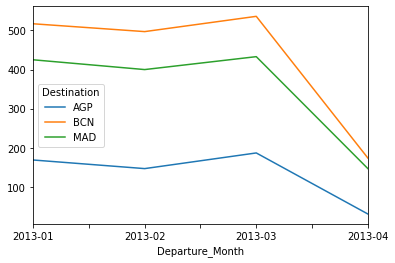

In [101]:
plotting_data.plot()

## Adjust the code to work with Big data